In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
# Load dataset
file_path = "/content/Online Retail.xlsx"
df = pd.read_excel(file_path)


In [6]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [7]:

# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype(int)


In [8]:

# Aggregate data by CustomerID
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of purchases
    'Quantity': 'sum',       # Total quantity purchased
    'UnitPrice': 'mean',     # Average unit price
    'Country': 'first'       # Country of the customer
}).reset_index()


In [9]:
# Drop categorical column for clustering
customer_data = customer_data.drop(columns=['Country'])

In [11]:
# Standardize the data
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_data.iloc[:, 1:])


In [12]:

# Find the optimal K using the Elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_scaled)
    inertia.append(kmeans.inertia_)

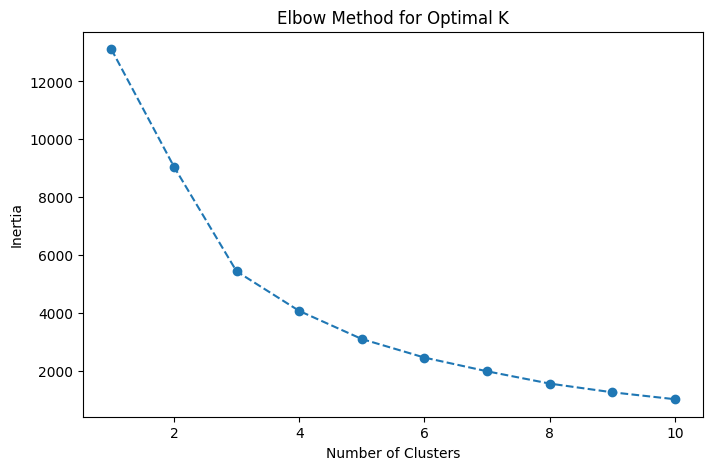

In [13]:

# Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [14]:

# Apply K-Means clustering with optimal K (choose based on elbow method, e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(customer_scaled)


In [15]:

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_scaled)
customer_data['PCA1'] = reduced_data[:, 0]
customer_data['PCA2'] = reduced_data[:, 1]

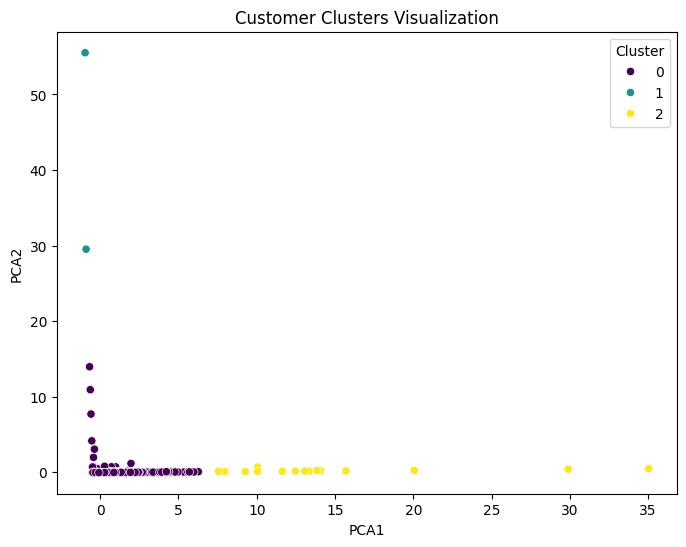

In [16]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=customer_data['Cluster'], palette='viridis', data=customer_data)
plt.title('Customer Clusters Visualization')
plt.show()
